In [ ]:
# AutoEncoder 실습 ! 필요 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train , _) , (x_test , _) = mnist.load_data()


In [ ]:
# data preprocessing

# data norm
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float') / 255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# data flatten
print('flatten 전 shape :', x_train.shape, x_test.shape)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print('flatten 후 shape : ', x_train.shape, x_test.shape)

flatten 전 shape : (60000, 784) (10000, 784)
flatten 후 shape :  (60000, 784) (10000, 784)


In [ ]:
# model
input_img  = Input(shape=(784,))
# 압축
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
# 원복
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='relu')(decoded)


In [ ]:
autoencoder = Model(inputs = input_img, outputs=decoded)

In [ ]:
encoder = Model(inputs = input_img, outputs = encoded)
encoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
Total params: 110816 (432.88 KB)
Trainable params: 110816 (432.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
autoencoder.fit(x_train,x_train,epochs=100,
                batch_size=128,shuffle=True,
                validation_data=(x_test,x_test))

Epoch 1/100
469/469 [==============================] - 8s 5ms/step - loss: 0.4102 - val_loss: 0.3539
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3470 - val_loss: 0.3316
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3317 - val_loss: 0.3054
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3087 - val_loss: 0.3148
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3206 - val_loss: 0.2962
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2850 - val_loss: 0.2813
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2615 - val_loss: 0.2496
Epoch 8/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2739 - val_loss: 0.2665
Epoch 9/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2611 - val_loss: 0.2610
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2667 - val_lo

313/313 [==============================] - 1s 2ms/step


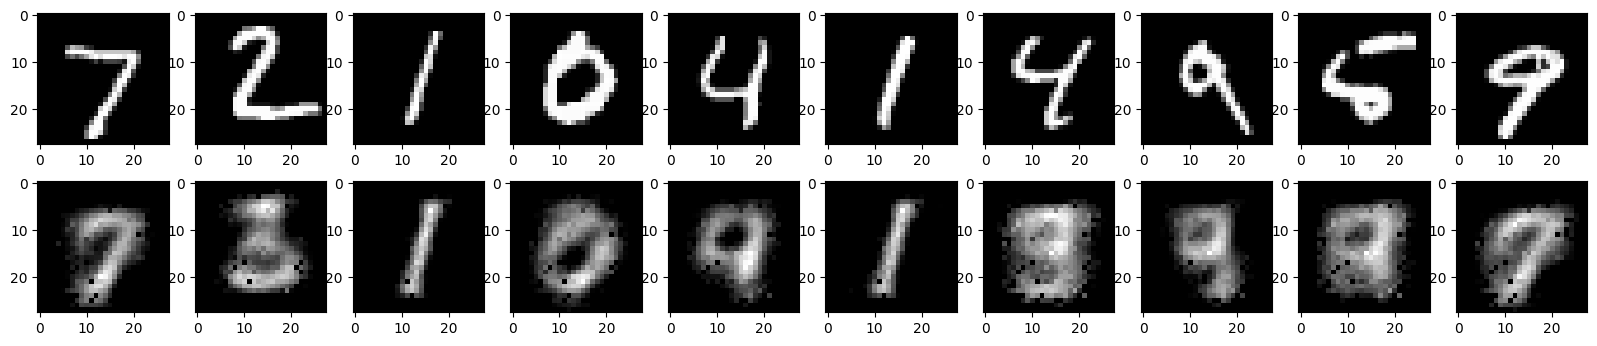

In [ ]:
encoded_img = encoder.predict(x_test)  # x_test 데이터를 인코더를 통해 인코딩하여 encoded_img에 저장합니다.
decoded_img = autoencoder.predict(x_test)  # 인코딩된 이미지를 디코딩하여 decoded_img에 저장합니다.

n = 10  # 시각화할 이미지의 수를 결정합니다.

plt.figure(figsize=(20,4))  # 그림을 생성하는데 사용할 Matplotlib figure를 설정합니다. 가로로 20인치, 세로로 4인치의 크기를 가집니다.

for i in range(n):  # 0부터 n-1까지의 범위에서 반복합니다.
  ax = plt.subplot(2,n, i+1)  # 그림을 2행 n열로 나누고, 그 중 첫 번째 행에 현재 인덱스 i에 해당하는 subplot을 설정합니다.
  plt.imshow(x_test[i].reshape(28,28))  # 현재 인덱스에 해당하는 원본 이미지를 28x28 픽셀 크기로 보여줍니다.
  plt.gray()  # 그레이스케일 이미지로 표시합니다.

  ax = plt.subplot(2,n, i+1+n)  # 그림의 두 번째 행에 현재 인덱스 i에 해당하는 subplot을 설정합니다.
  plt.imshow(decoded_img[i].reshape(28,28))  # 현재 인덱스에 해당하는 디코딩된 이미지를 28x28 픽셀 크기로 보여줍니다.
  plt.gray()  # 그레이스케일 이미지로 표시합니다.

plt.show()  # 모든 subplot을 표시합니다.


In [ ]:
# stable diffusion
!pip install keras_cv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 19.8 MB/s eta 0:00:00


In [ ]:
import time
import keras_cv
from tensorflow import keras

Using TensorFlow backend


In [ ]:
stable_model = keras_cv.models.StableDiffusion()

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [ ]:
images = stable_model.text_to_image('photograph of an astronaut')
images

198180272/198180272 [==============================] - 1s 0us/step


array([[[[  0,   0,  20],
         [  0,   0,  17],
         [  0,   0,  21],
         ...,
         [  0,   8,  25],
         [  1,   5,  24],
         [  0,   1,  10]],

        [[  2,   6,  23],
         [  0,   0,  14],
         [  4,   4,  25],
         ...,
         [  2,   9,  26],
         [  0,   4,  16],
         [  2,   0,  12]],

        [[  0,   0,  17],
         [  6,   7,  24],
         [  4,   3,  24],
         ...,
         [  7,  12,  35],
         [  1,   2,  25],
         [  2,   3,  21]],

        ...,

        [[186, 187, 166],
         [163, 154, 137],
         [152, 137, 106],
         ...,
         [  3,   7,  33],
         [  6,   8,  33],
         [  6,   8,  28]],

        [[181, 178, 158],
         [164, 157, 133],
         [136, 112,  81],
         ...,
         [  8,   8,  34],
         [  0,   4,  29],
         [  0,   7,  28]],

        [[178, 170, 148],
         [170, 169, 136],
         [133, 114,  77],
         ...,
         [  7,   8,  32],
        

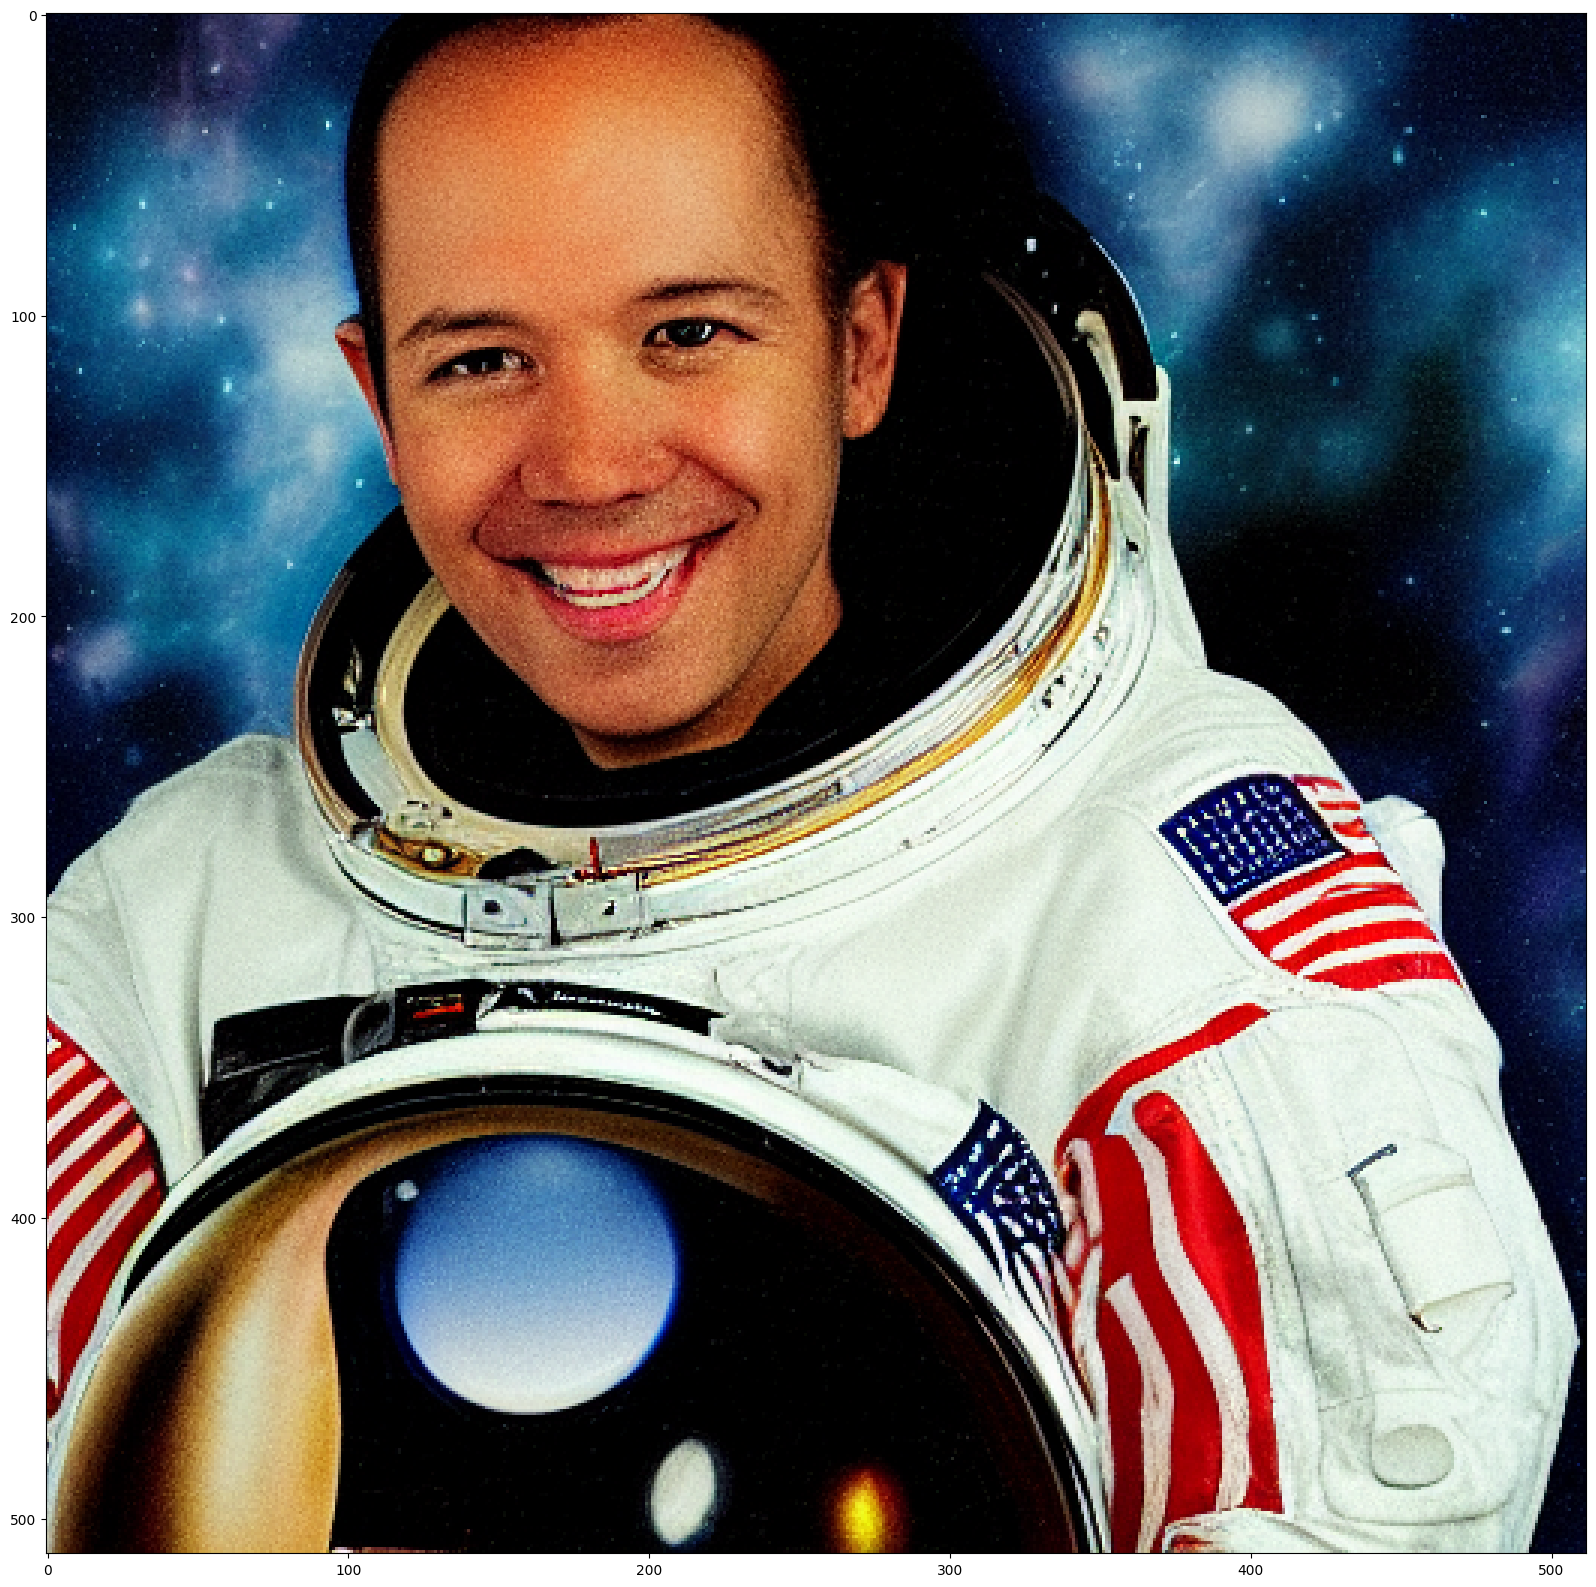

In [ ]:
def plot_image(images):
  plt.figure(figsize=(20,20))
  for i in range(len(images)):
    ax = plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

plot_image(images)